In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


Load Dataset:

Summarize the Dataset:

In [4]:
# Load dataset
url = "C:\\Users\\DELL\\Predicting Hospital Readmissions\\synthetic_hospital_readmissions_data.csv"
data = pd.read_csv(url)

# Dataset Summary
print("Dataset Summary:")
print(data.info())




Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient_ID             10000 non-null  int64 
 1   Age                    10000 non-null  int64 
 2   Gender                 10000 non-null  object
 3   Admission_Type         10000 non-null  object
 4   Diagnosis              10000 non-null  object
 5   Num_Lab_Procedures     10000 non-null  int64 
 6   Num_Medications        10000 non-null  int64 
 7   Num_Outpatient_Visits  10000 non-null  int64 
 8   Num_Inpatient_Visits   10000 non-null  int64 
 9   Num_Emergency_Visits   10000 non-null  int64 
 10  Num_Diagnoses          10000 non-null  int64 
 11  A1C_Result             5966 non-null   object
 12  Readmitted             10000 non-null  object
dtypes: int64(8), object(5)
memory usage: 1015.8+ KB
None


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Load the dataset (assuming the file is in CSV format)
data = pd.read_csv('C:\\Users\\DELL\\Predicting Hospital Readmissions\\synthetic_hospital_readmissions_data.csv')

# Step 1.1: Handle missing values
# Let's fill missing values in 'A1C_Result' with the mode (most frequent category)
data['A1C_Result'].fillna(data['A1C_Result'].mode()[0], inplace=True)

# Encode 'Readmitted' as binary (1 for "Yes" and 0 for "No")
data['Readmitted'] = data['Readmitted'].map({'Yes': 1, 'No': 0})

# Encode 'A1C_Result' as binary (0 for "Normal" and 1 for "Abnormal"), if not already numeric
data['A1C_Result'] = data['A1C_Result'].map({'Normal': 0, 'Abnormal': 1})

# Check the correlation between 'A1C_Result' and 'Readmitted'
correlation_with_readmitted = data[['A1C_Result', 'Readmitted']].corr().loc['A1C_Result', 'Readmitted']

# Display the correlation
print("Correlation between A1C_Result and Readmitted:", correlation_with_readmitted)


Correlation between A1C_Result and Readmitted: 0.017520306370431792


C:\Users\DELL\AppData\Local\Temp\ipykernel_20332\3881891917.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['A1C_Result'].fillna(data['A1C_Result'].mode()[0], inplace=True)


In [6]:
## Dropping the A1C_Result column from the dataset
#dataset_cleaned = data.drop(columns=['A1C_Result'])

# Specify the full path where you want to save the cleaned CSV file
file_path = r'C:\Users\DELL\Predicting Hospital Readmissions\hospital_readmissions_cleaned.csv'

# Save the cleaned data to the specified path
data.to_csv(file_path, index=False)




# Confirm file saved successfully
print(f"File saved successfully at {file_path}")

File saved successfully at C:\Users\DELL\Predicting Hospital Readmissions\hospital_readmissions_cleaned.csv


In [7]:
print("Unique values in A1C_Result:", data['A1C_Result'].unique())
print("Unique values in Readmitted:", data['Readmitted'].unique())


Unique values in A1C_Result: [0 1]
Unique values in Readmitted: [0 1]


C:\Users\DELL\AppData\Local\Temp\ipykernel_20332\482898341.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=a1c_readmission.index, y=a1c_readmission.values, palette="viridis")


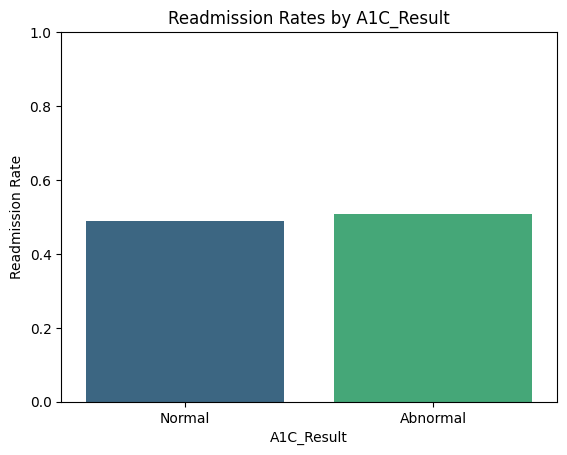

In [8]:


# Recalculate the proportion of readmitted patients for each A1C_Result category
a1c_readmission = data.groupby('A1C_Result')['Readmitted'].mean()

# Plot the relationship
sns.barplot(x=a1c_readmission.index, y=a1c_readmission.values, palette="viridis")
plt.title("Readmission Rates by A1C_Result")
plt.xlabel("A1C_Result")
plt.ylabel("Readmission Rate")
plt.xticks([0, 1], ['Normal', 'Abnormal'])
plt.ylim(0, 1)
plt.show()


In [9]:
import pandas as pd

# Load the dataset
file_path = "C:\\Users\\DELL\\Predicting Hospital Readmissions\\hospital_readmissions_cleaned.csv"
df = pd.read_csv(file_path)




# Drop rows where 'Age' is greater than 85
df = df[df['Age'] <= 85]

# Display the first few rows of the updated dataset
print(df.head())

# Print the count of rows after dropping
print(f"Number of rows after dropping Age > 85: {len(df)}")

# Optionally, save the updated data to a new CSV file
df.to_csv("C:\\Users\\DELL\\Predicting Hospital Readmissions\\hospital_readmissions_age_filtered.csv", index=False)


   Patient_ID  Age  Gender Admission_Type      Diagnosis  Num_Lab_Procedures  \
0           1   69  Female         Urgent       Diabetes                  35   
1           2   32   Other      Emergency      Infection                  66   
2           3   78  Female       Elective       Diabetes                  22   
3           4   38  Female         Urgent      Infection                  22   
4           5   41    Male      Emergency  Heart Disease                   3   

   Num_Medications  Num_Outpatient_Visits  Num_Inpatient_Visits  \
0               14                      2                     1   
1                3                      1                     2   
2                2                      4                     3   
3               10                      2                     2   
4                6                      4                     3   

   Num_Emergency_Visits  Num_Diagnoses  A1C_Result  Readmitted  
0                     4              5           0 

In [10]:
import pandas as pd

# Load the dataset
file_path = "C:\\Users\\DELL\\Predicting Hospital Readmissions\\hospital_readmissions_age_filtered.csv"
df = pd.read_csv(file_path)

# Step 1: Detect duplicate rows
duplicate_rows = df[df.duplicated()]
num_duplicates = duplicate_rows.shape[0]

print(f"Number of duplicate rows: {num_duplicates}")
if num_duplicates > 0:
    print(duplicate_rows.head())  # Show a sample of duplicate rows if any

# Step 2: Detect outliers using the IQR method
# Selecting only numerical columns for outlier detection
numerical_columns = df.select_dtypes(include=['number']).columns

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points beyond 1.5 * IQR
outliers = df[((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
num_outliers = outliers.shape[0]

print(f"Number of outliers: {num_outliers}")
if num_outliers > 0:
    print(outliers.head())  # Show a sample of outliers if any

file_path_1 = "C:\\Users\\DELL\\Predicting Hospital Readmissions\\hospital_readmissions_outliers.csv"
# Optional: Saving the outliers to a CSV file if needed
outliers.to_csv(file_path_1, index=False)


Number of duplicate rows: 0
Number of outliers: 0


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the data
file_path = "C:\\Users\\DELL\\Predicting Hospital Readmissions\\hospital_readmissions_age_filtered.csv"
data = pd.read_csv(file_path)

# Step 1: Initial Feature Engineering

# Step 1.1: Create Age Groups
age_bins = [0, 30, 50, 70, 100]
age_labels = ['<30', '30-50', '50-70', '70-85']
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)


# Step 1.3: Create Total Hospital Visits
data['Total_Visits'] = data['Num_Outpatient_Visits'] + data['Num_Inpatient_Visits'] + data['Num_Emergency_Visits']

# Step 1.4: Create Severity Index
data['Severity_Index'] = data['Num_Lab_Procedures'] + data['Num_Medications'] + data['Num_Diagnoses']








# Save the enhanced data to a CSV file
output_path = "C:\\Users\\DELL\\Predicting Hospital Readmissions\\hospital_readmissions_feature_engineered.csv"
data.to_csv(output_path, index=False)

print("Feature engineering completed and the dataset has been saved.")


Feature engineering completed and the dataset has been saved.


In [12]:
cols = ['Gender','Diagnosis','Admission_Type']
for i in cols:
    print(i)
    print(data[i].unique())

Gender
['Female' 'Other' 'Male']
Diagnosis
['Diabetes' 'Infection' 'Heart Disease' 'Injury']
Admission_Type
['Urgent' 'Emergency' 'Elective']


In [13]:
data['Gender'].value_counts()

Gender
Female    3392
Other     3309
Male      3289
Name: count, dtype: int64

In [14]:
data['Diagnosis'].value_counts()

Diagnosis
Infection        2571
Diabetes         2516
Heart Disease    2474
Injury           2429
Name: count, dtype: int64

In [15]:
data['Admission_Type'].value_counts()

Admission_Type
Emergency    3398
Urgent       3335
Elective     3257
Name: count, dtype: int64

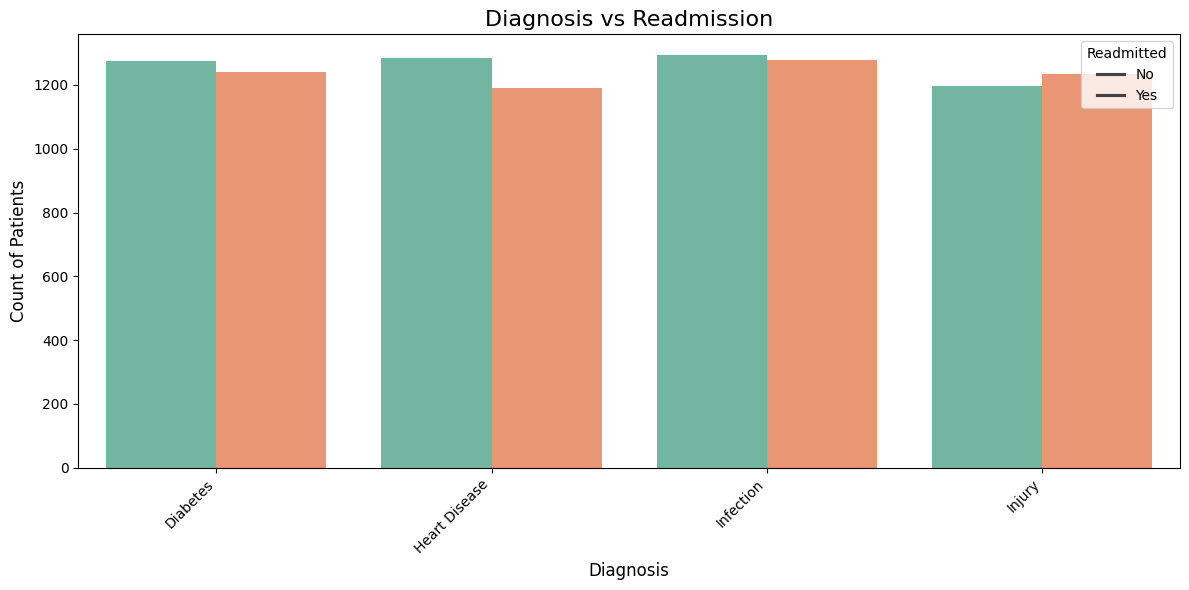

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by Diagnosis and Readmitted status, and count occurrences
diagnosis_readmission = data.groupby(['Diagnosis', 'Readmitted']).size().reset_index(name='Count')

# Plot the data as a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=diagnosis_readmission, x='Diagnosis', y='Count', hue='Readmitted', palette='Set2')

# Customize the chart
plt.title('Diagnosis vs Readmission', fontsize=16)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Count of Patients', fontsize=12)
plt.xticks(rotation=45, horizontalalignment='right')
plt.legend(title='Readmitted', labels=['No', 'Yes'])
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_20332\1695545491.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_diagnosis_data = data.groupby(['Age_Group', 'Diagnosis']).size().reset_index(name='Count')


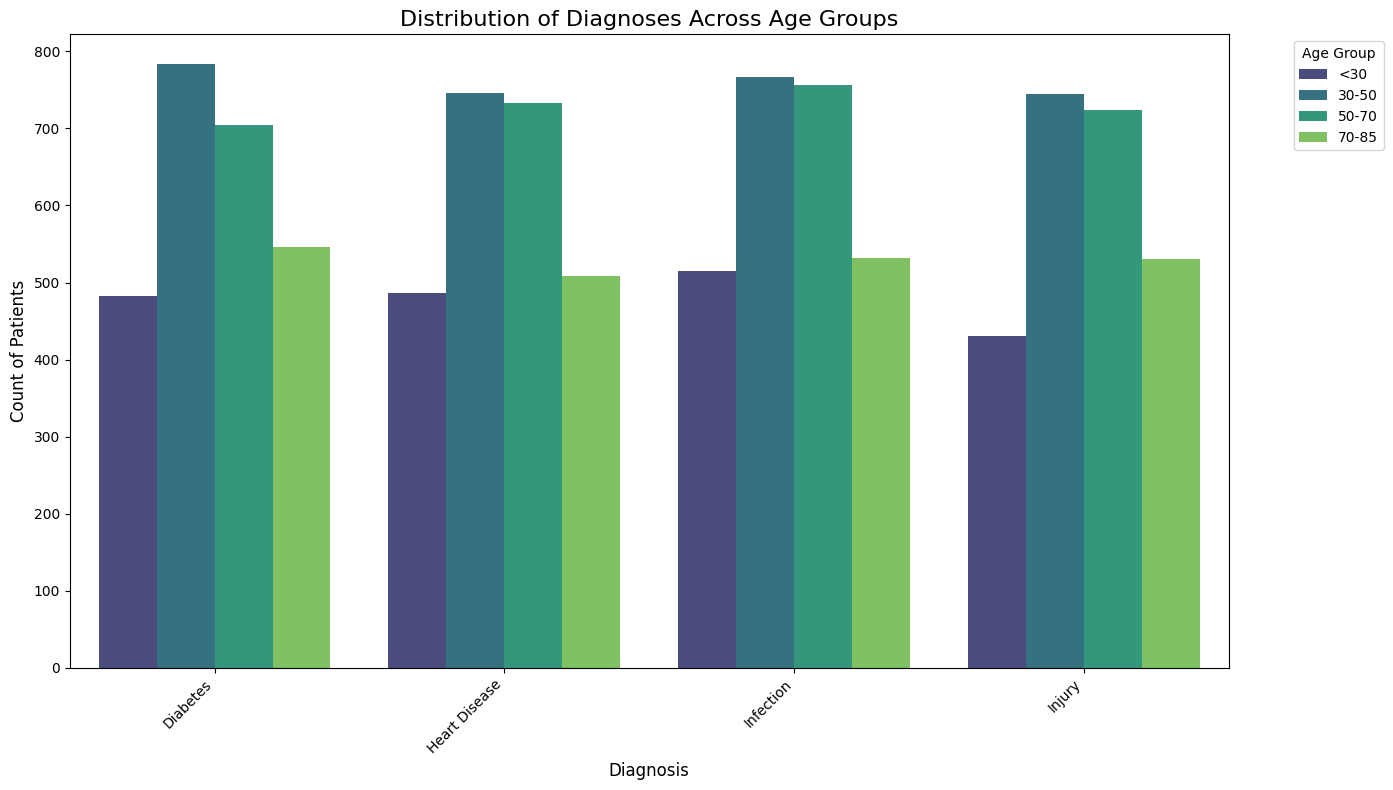

In [17]:
# Group data by Age_Group and Diagnosis, and count occurrences
age_diagnosis_data = data.groupby(['Age_Group', 'Diagnosis']).size().reset_index(name='Count')

# Plot the grouped data as a bar chart
plt.figure(figsize=(14, 8))
sns.barplot(data=age_diagnosis_data, x='Diagnosis', y='Count', hue='Age_Group', palette='viridis')

# Customize the chart
plt.title('Distribution of Diagnoses Across Age Groups', fontsize=16)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Count of Patients', fontsize=12)
plt.xticks(rotation=45, horizontalalignment='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_20332\3389871945.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_readmitted_visits = data.groupby(['Age_Group', 'Readmitted'])['Total_Visits'].sum().reset_index()


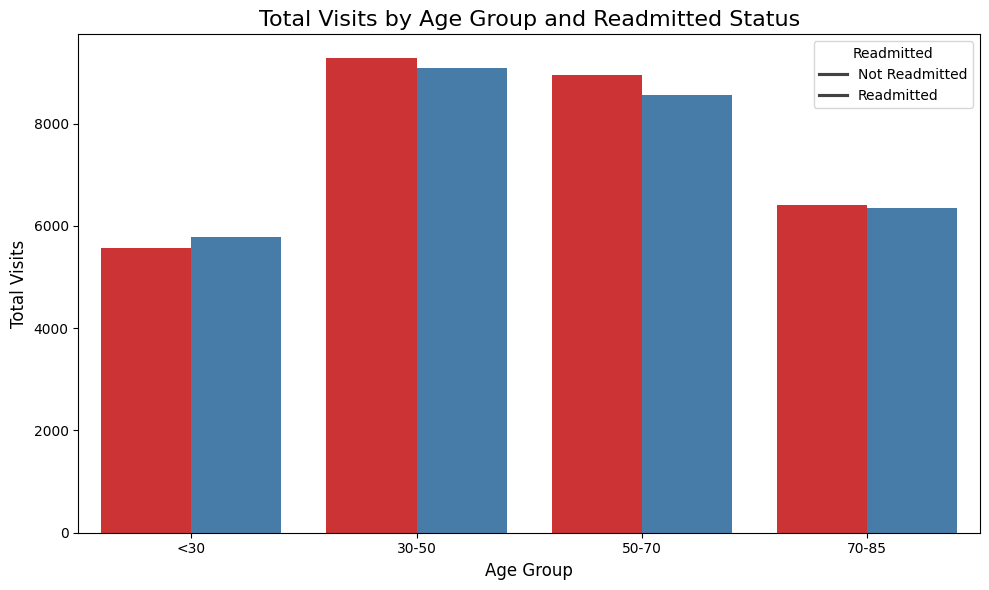

In [18]:
# Plot total visits by Age_Group and Readmitted status

age_readmitted_visits = data.groupby(['Age_Group', 'Readmitted'])['Total_Visits'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=age_readmitted_visits, x='Age_Group', y='Total_Visits', hue='Readmitted', palette='Set1')

# Customize the plot
plt.title('Total Visits by Age Group and Readmitted Status', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Visits', fontsize=12)
plt.legend(title='Readmitted', labels=['Not Readmitted', 'Readmitted'])
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_20332\3067816314.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_readmission = data.groupby(['Age_Group', 'Gender', 'Readmitted']).size().reset_index(name='Count')


  Age_Group  Gender  Readmitted  Count
0       <30  Female           0    322
1       <30  Female           1    331
2       <30    Male           0    310
3       <30    Male           1    309
4       <30   Other           0    310


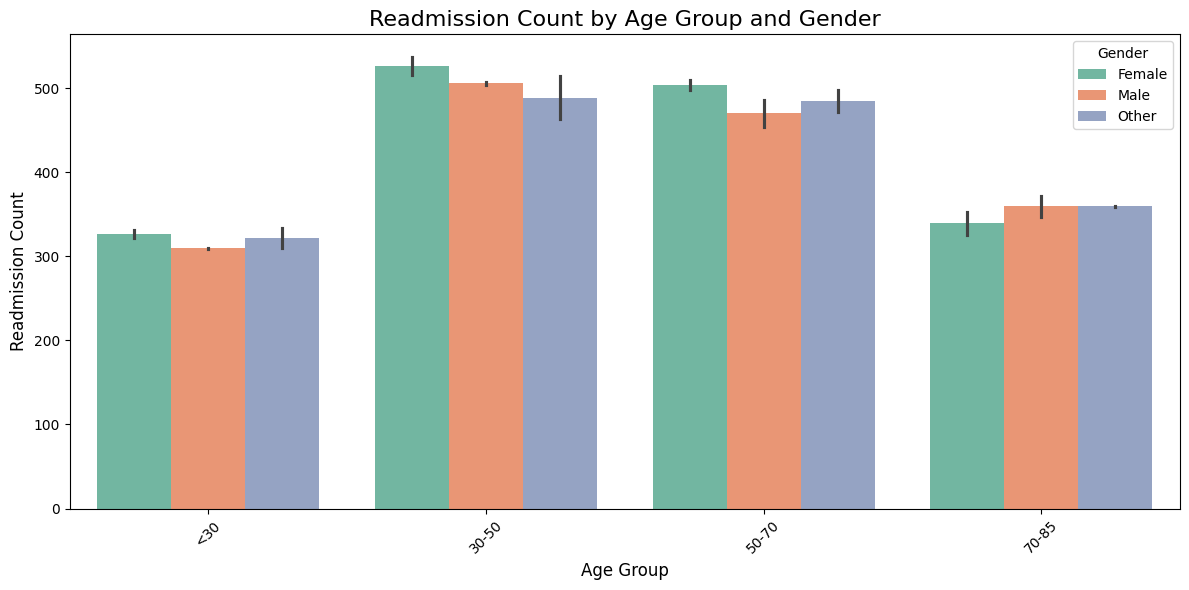

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by Age_Group, Gender, and Readmitted status, and calculate counts
age_gender_readmission = data.groupby(['Age_Group', 'Gender', 'Readmitted']).size().reset_index(name='Count')

# Display the aggregated data to verify
print(age_gender_readmission.head())
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=age_gender_readmission,
    x='Age_Group',
    y='Count',
    hue='Gender',
    palette='Set2'
)

# Customize the plot
plt.title('Readmission Count by Age Group and Gender', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Readmission Count', fontsize=12)
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()



C:\Users\DELL\AppData\Local\Temp\ipykernel_20332\160904048.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_admission_readmission = data.groupby(['Age_Group', 'Admission_Type', 'Readmitted']).size().reset_index(name='Count')


  Age_Group Admission_Type  Readmitted  Count
0       <30       Elective           0    284
1       <30       Elective           1    322
2       <30      Emergency           0    343
3       <30      Emergency           1    322
4       <30         Urgent           0    315


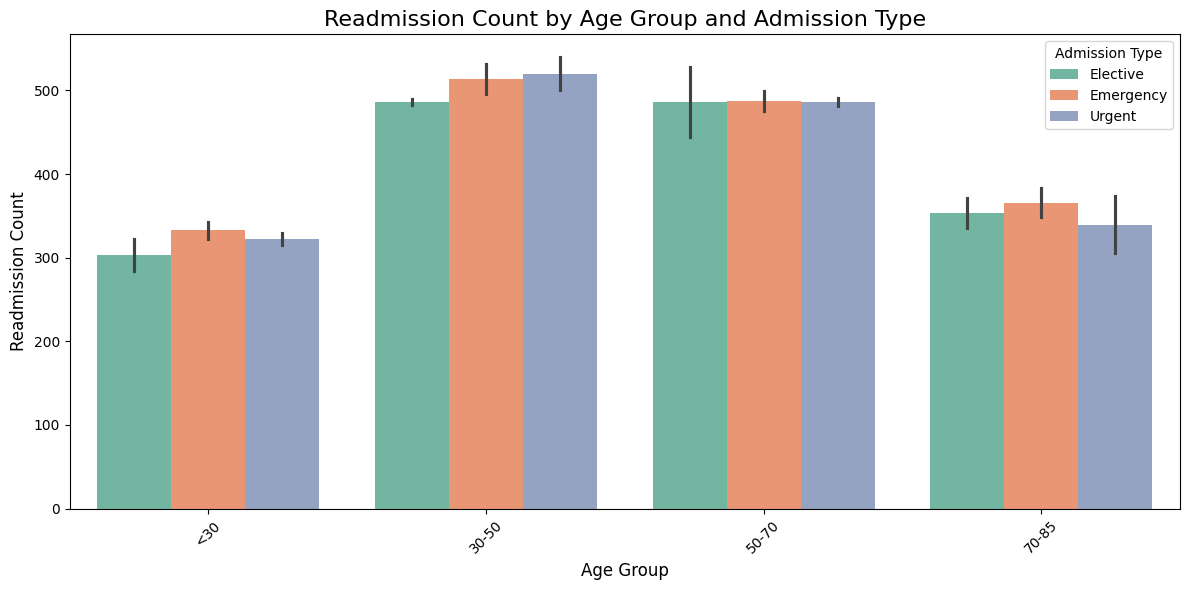

In [20]:
# Group data by Age_Group, Admission_Type, and Readmitted status, and calculate counts
age_admission_readmission = data.groupby(['Age_Group', 'Admission_Type', 'Readmitted']).size().reset_index(name='Count')

# Display the aggregated data to verify
print(age_admission_readmission.head())

import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=age_admission_readmission,
    x='Age_Group',
    y='Count',
    hue='Admission_Type',
    palette='Set2'
)

# Customize the plot
plt.title('Readmission Count by Age Group and Admission Type', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Readmission Count', fontsize=12)
plt.legend(title='Admission Type')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()



In [21]:
data['High_Risk_Age_Group'] = data['Age_Group'].apply(lambda x: 1 if x in ['30-50', '50-70'] else 0)
# Save the enhanced data to a CSV file
output_path = "C:\\Users\\DELL\\Predicting Hospital Readmissions\\hospital_readmissions_feature_engineered_enhanced.csv"
data.to_csv(output_path, index=False)

In [22]:
categorical_cols = ['Age_Group','Gender','Admission_Type','Diagnosis' ]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
    
# Dropping 'Patient_ID' and 'Age' columns from the dataset
data = data.drop(columns=['Patient_ID', 'Age'])

# Display the updated dataset structure to confirm
data.head()


,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted,Age_Group,Total_Visits,Severity_Index,High_Risk_Age_Group
0,0,2,0,35,14,2,1,4,5,0,0,1,7,54,1
1,2,1,2,66,3,1,2,4,6,0,0,0,7,75,1
2,0,0,0,22,2,4,3,3,5,1,1,2,10,29,0
3,0,2,2,22,10,2,2,3,9,0,1,0,7,41,1
4,1,1,1,3,6,4,3,1,2,1,0,0,8,11,1


In [24]:
print(data.groupby(['Age_Group', 'Readmitted']).size())


Age_Group  Readmitted
0          0             1555
           1             1486
1          0             1494
           1             1424
2          0             1057
           1             1059
3          0              942
           1              973
dtype: int64


In [23]:
from scipy.stats import ttest_ind
import numpy as np

# Add High_Risk_Age_Group column (1 for high-risk, 0 otherwise)
data['High_Risk_Age_Group'] = data['Age_Group'].apply(lambda x: 1 if x in ['30-50', '50-70'] else 0)

# Perform t-test for Age_Group
for age_group in data['Age_Group'].sort_values().unique():
    # Define samples for readmitted and not readmitted patients in the given age group
    readmitted = data[(data['Readmitted'] == 1) & (data['Age_Group'] == age_group)]
    not_readmitted = data[(data['Readmitted'] == 0) & (data['Age_Group'] == age_group)]
    
    print(f"T-test results for Age Group: {age_group}")
    print("Avg Readmission Rate for Readmitted Patients:", "{:.2f}%".format(np.mean(readmitted['Readmitted'])*100))
    print("Avg Readmission Rate for Not Readmitted Patients:", "{:.2f}%".format(np.mean(not_readmitted['Readmitted'])*100))
    print("T-Statistic:", "{:.2f}".format(ttest_ind(readmitted['Readmitted'], not_readmitted['Readmitted'], equal_var=False).statistic))
    print("P-Value:", "{:.2f}%".format(ttest_ind(readmitted['Readmitted'], not_readmitted['Readmitted'], equal_var=False).pvalue*100))
    print("")

# Perform t-test for High_Risk_Age_Group
for risk_group in data['High_Risk_Age_Group'].sort_values().unique():
    # Define samples for readmitted and not readmitted patients in the high-risk group
    readmitted = data[(data['Readmitted'] == 1) & (data['High_Risk_Age_Group'] == risk_group)]
    not_readmitted = data[(data['Readmitted'] == 0) & (data['High_Risk_Age_Group'] == risk_group)]
    
    group_label = "High-Risk" if risk_group == 1 else "Not High-Risk"
    print(f"T-test results for {group_label} Age Group")
    print("Avg Readmission Rate for Readmitted Patients:", "{:.2f}%".format(np.mean(readmitted['Readmitted'])*100))
    print("Avg Readmission Rate for Not Readmitted Patients:", "{:.2f}%".format(np.mean(not_readmitted['Readmitted'])*100))
    print("T-Statistic:", "{:.2f}".format(ttest_ind(readmitted['Readmitted'], not_readmitted['Readmitted'], equal_var=False).statistic))
    print("P-Value:", "{:.2f}%".format(ttest_ind(readmitted['Readmitted'], not_readmitted['Readmitted'], equal_var=False).pvalue*100))
    print("")


T-test results for Age Group: 0
Avg Readmission Rate for Readmitted Patients: 100.00%
Avg Readmission Rate for Not Readmitted Patients: 0.00%
T-Statistic: inf
P-Value: 0.00%

T-test results for Age Group: 1
Avg Readmission Rate for Readmitted Patients: 100.00%
Avg Readmission Rate for Not Readmitted Patients: 0.00%
T-Statistic: inf
P-Value: 0.00%

T-test results for Age Group: 2
Avg Readmission Rate for Readmitted Patients: 100.00%
Avg Readmission Rate for Not Readmitted Patients: 0.00%
T-Statistic: inf
P-Value: 0.00%

T-test results for Age Group: 3
Avg Readmission Rate for Readmitted Patients: 100.00%
Avg Readmission Rate for Not Readmitted Patients: 0.00%
T-Statistic: inf
P-Value: 0.00%

T-test results for Not High-Risk Age Group
Avg Readmission Rate for Readmitted Patients: 100.00%
Avg Readmission Rate for Not Readmitted Patients: 0.00%
T-Statistic: inf
P-Value: 0.00%



c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [22]:
# Select columns for clustering
quantCols = data.select_dtypes(include=[int,float]).columns

# Create new DataFrame with clustering variables
data_f = data[quantCols]



# Save the enhanced data to a CSV file
output_path = "C:\\Users\\DELL\\Predicting Hospital Readmissions\\hospital_readmissions_feature_engineered_enhanced_quant.csv"
data_f.to_csv(output_path, index=False)
data_f

,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted,Age_Group,Total_Visits,Severity_Index,High_Risk_Age_Group
0,0,2,0,35,14,2,1,4,5,0,0,1,7,54,0
1,2,1,2,66,3,1,2,4,6,0,0,0,7,75,0
2,0,0,0,22,2,4,3,3,5,1,1,2,10,29,0
3,0,2,2,22,10,2,2,3,9,0,1,0,7,41,0
4,1,1,1,3,6,4,3,1,2,1,0,0,8,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,2,2,3,32,7,3,2,2,1,0,0,1,7,40,0
9986,1,2,1,28,9,3,3,0,2,1,0,0,6,39,0
9987,1,0,3,56,22,3,1,1,1,0,0,3,5,79,0
9988,0,0,3,4,10,4,3,3,3,1,1,2,10,17,0


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9990.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test P-Value: 1.4706698248493633e-55
Data is not normally distributed (likely skewed).


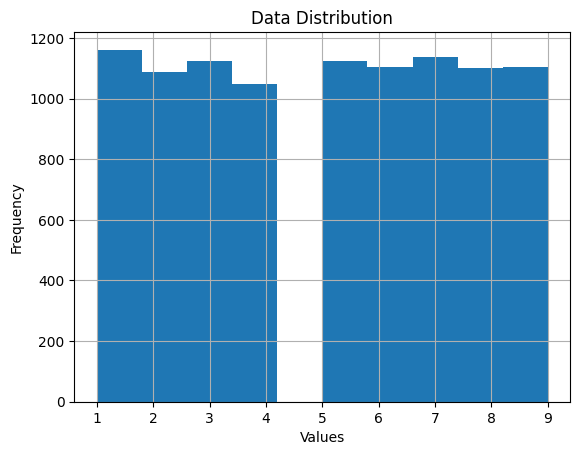

In [23]:
from scipy.stats import shapiro

stat, p = shapiro(data_f['Num_Diagnoses'])
print(f"Shapiro-Wilk Test P-Value: {p}")
if p < 0.05:
    print("Data is not normally distributed (likely skewed).")
else:
    print("Data is normally distributed (not skewed).")


import matplotlib.pyplot as plt

# Plot histogram
data_f['Num_Diagnoses'].hist(bins=10)
plt.title('Data Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


Shapiro-Wilk Test P-Value: 1.3007203696032494e-64
Data is not normally distributed (likely skewed).


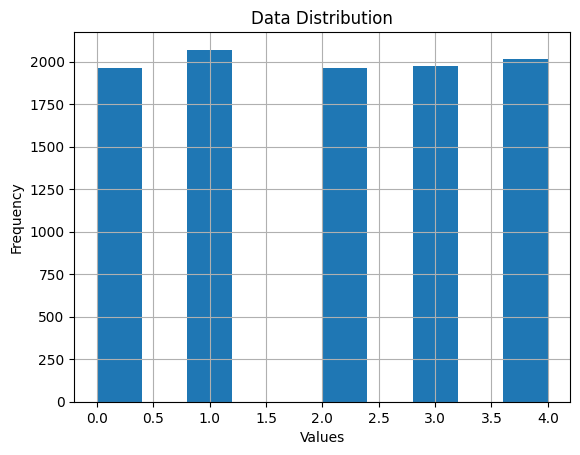

In [24]:
from scipy.stats import shapiro

stat, p = shapiro(data_f['Num_Emergency_Visits'])
print(f"Shapiro-Wilk Test P-Value: {p}")
if p < 0.05:
    print("Data is not normally distributed (likely skewed).")
else:
    print("Data is normally distributed (not skewed).")


import matplotlib.pyplot as plt

# Plot histogram
data_f['Num_Emergency_Visits'].hist(bins=10)
plt.title('Data Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


Shapiro-Wilk Test P-Value: 1.4210774178051337e-36
Data is not normally distributed (likely skewed).


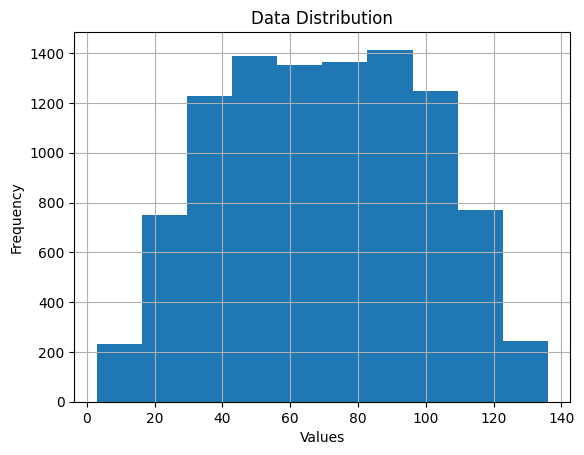

In [25]:
from scipy.stats import shapiro

stat, p = shapiro(data_f['Severity_Index'])
print(f"Shapiro-Wilk Test P-Value: {p}")
if p < 0.05:
    print("Data is not normally distributed (likely skewed).")
else:
    print("Data is normally distributed (not skewed).")


import matplotlib.pyplot as plt

# Plot histogram
data_f['Severity_Index'].hist(bins=10)
plt.title('Data Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


In [26]:
#Transforming all colimns that have noticeable skewness
transformCols = ['Num_Lab_Procedures','Num_Medications','Num_Outpatient_Visits',
                 'Num_Inpatient_Visits','Num_Emergency_Visits','Num_Diagnoses','Total_Visits','Severity_Index']
all([pd.api.types.is_numeric_dtype(data_f[col]) for col in transformCols])

df_log = data_f.copy()
# Perform a log transformation of the data to unskew the data
for feat in transformCols:
    #Add one to avoid INF values
    df_log[feat] = np.log(1+data_f[feat])

#Check how many INF readings we have in the data
np.isinf(df_log).sum()

#Note the high rates of INF readings in n_procedures, n_outpatient, n_inpatient and n_emergency 

#Change INF values to mean for each feature
for i in transformCols:
    df_log[i].replace([np.inf, -np.inf], np.nan, inplace=True)
    df_log[i] = df_log[i].fillna(df_log[i].mean())

np.isinf(df_log).sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_19732\1165285900.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_log[i].replace([np.inf, -np.inf], np.nan, inplace=True)


Gender                   0
Admission_Type           0
Diagnosis                0
Num_Lab_Procedures       0
Num_Medications          0
Num_Outpatient_Visits    0
Num_Inpatient_Visits     0
Num_Emergency_Visits     0
Num_Diagnoses            0
A1C_Result               0
Readmitted               0
Age_Group                0
Total_Visits             0
Severity_Index           0
High_Risk_Age_Group      0
dtype: int64

<Axes: title={'center': 'Correlation Matrix of Model Features'}>

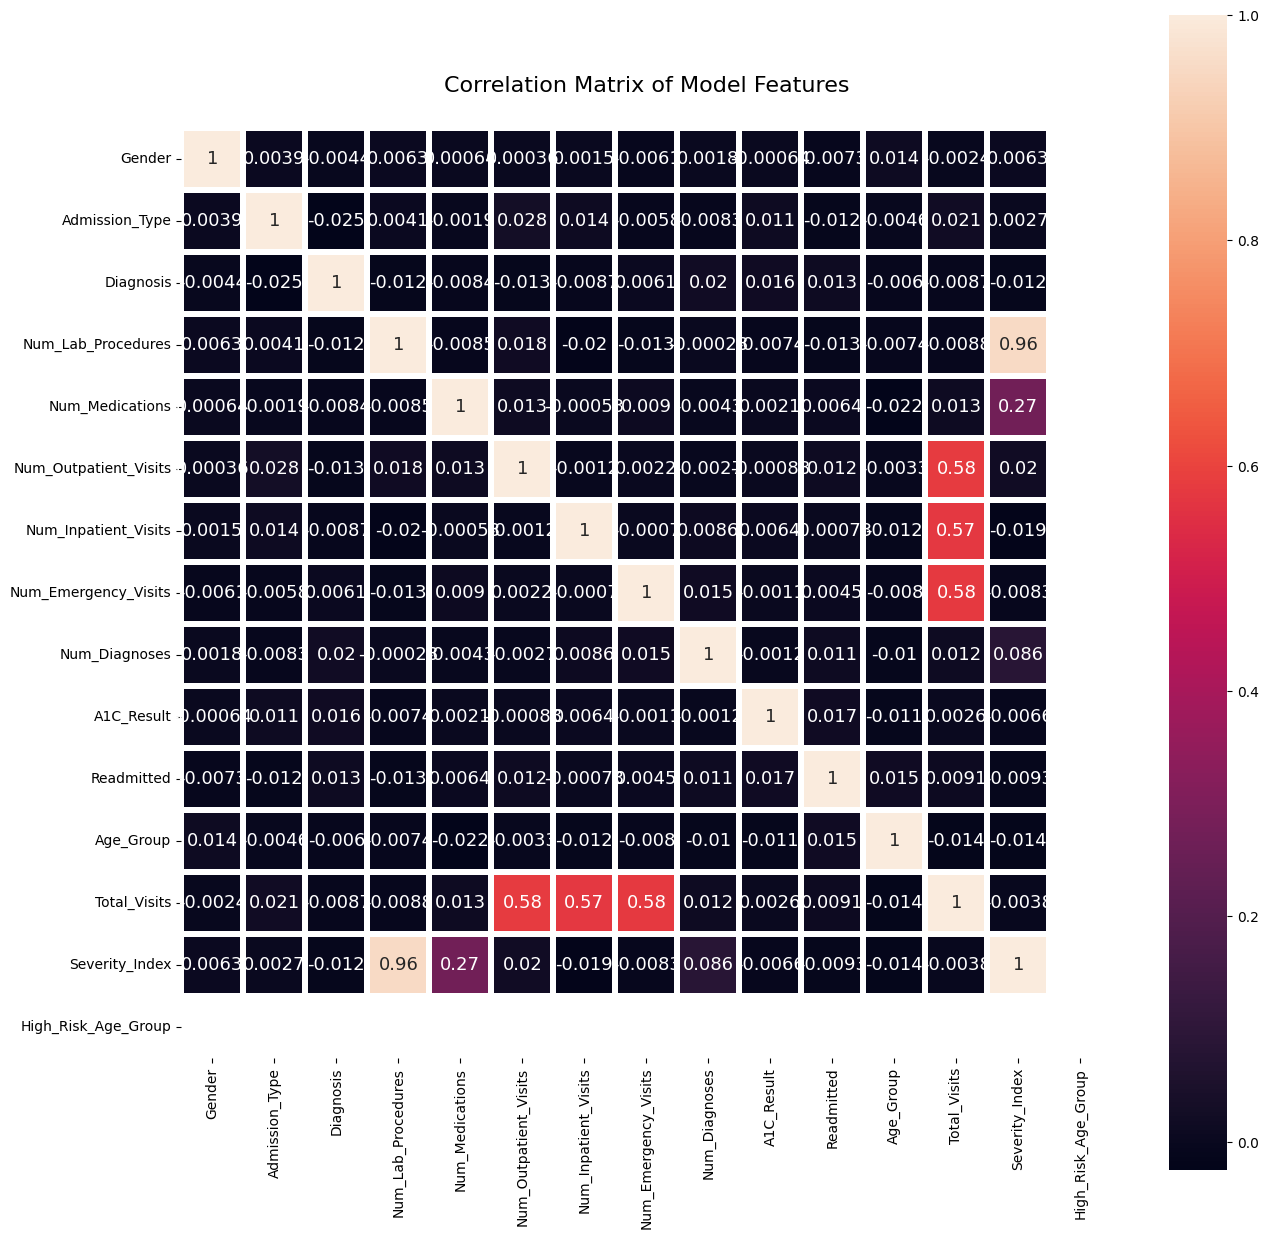

In [27]:
def corr_matrix(dataframe, x, y, title):
    plt.subplots(figsize=(x, y))
    plt.title(title, fontsize=16,y=1.03)
    return sns.heatmap(dataframe.corr(),
            annot=True,
            linewidths=3,
            annot_kws={"fontsize":13},
            square=True,
           )

corr_matrix(data_f, 15, 15, 'Correlation Matrix of Model Features')

In [42]:
# Instantiate StandardScaler, PCA as scaler and pca respectively

from sklearn.decomposition import PCA

from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
pca = PCA()
# Create the pipeline using scaler and the pca object
pipeline = make_pipeline(scaler, pca)

# Fit and transform the model
df_normalized = pipeline.fit_transform(df_log)
df_normalized.shape

(9990, 15)

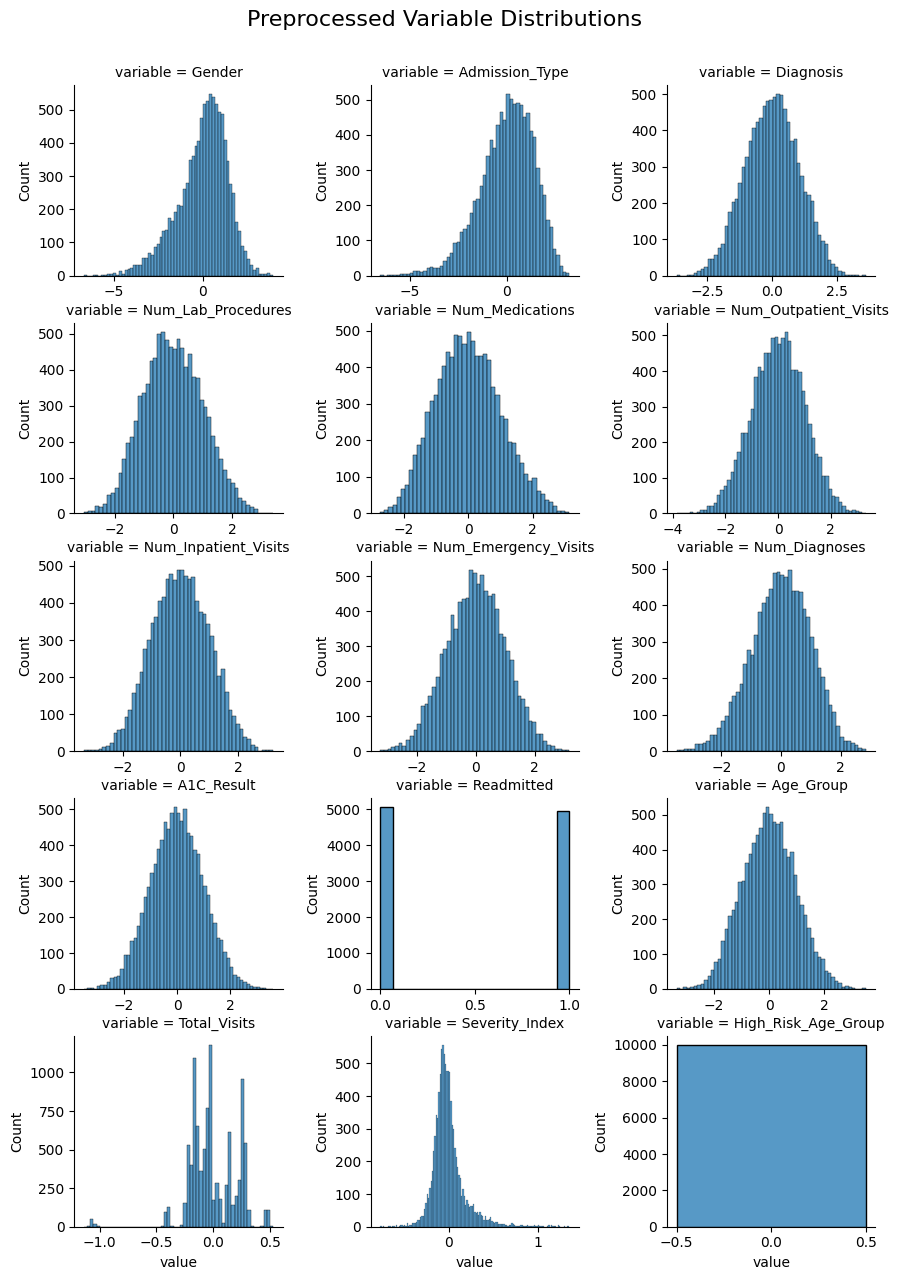

In [43]:
#Now need to scale the data for further analysis
# Instantiate StandardScaler, PCA as scaler and pca respectively
#scaler = StandardScaler()
#scaler.fit(df_log)

# Scale and center the data
#df_normalized = scaler.transform(df_log)

# Create a pandas DataFrame of the processed data
df_processed = pd.DataFrame(
    data=df_normalized, index=df_log.index, columns=df_log.columns
)

#Make sure our y variable (readmitted indicator) is not processed - Required for logistic regression
#Not sure this is legit given we are dropping in a non-processed target variable
df_processed['Readmitted'] = data_f['Readmitted']

# Plot the distributions of the selected variables
g = sns.FacetGrid(df_processed.melt(), 
                  col="variable", 
                  col_wrap = 3, 
                  sharey=False, 
                  sharex=False
                 )
g.map(sns.histplot, "value")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Preprocessed Variable Distributions", fontsize=16,y=.85)
plt.show()

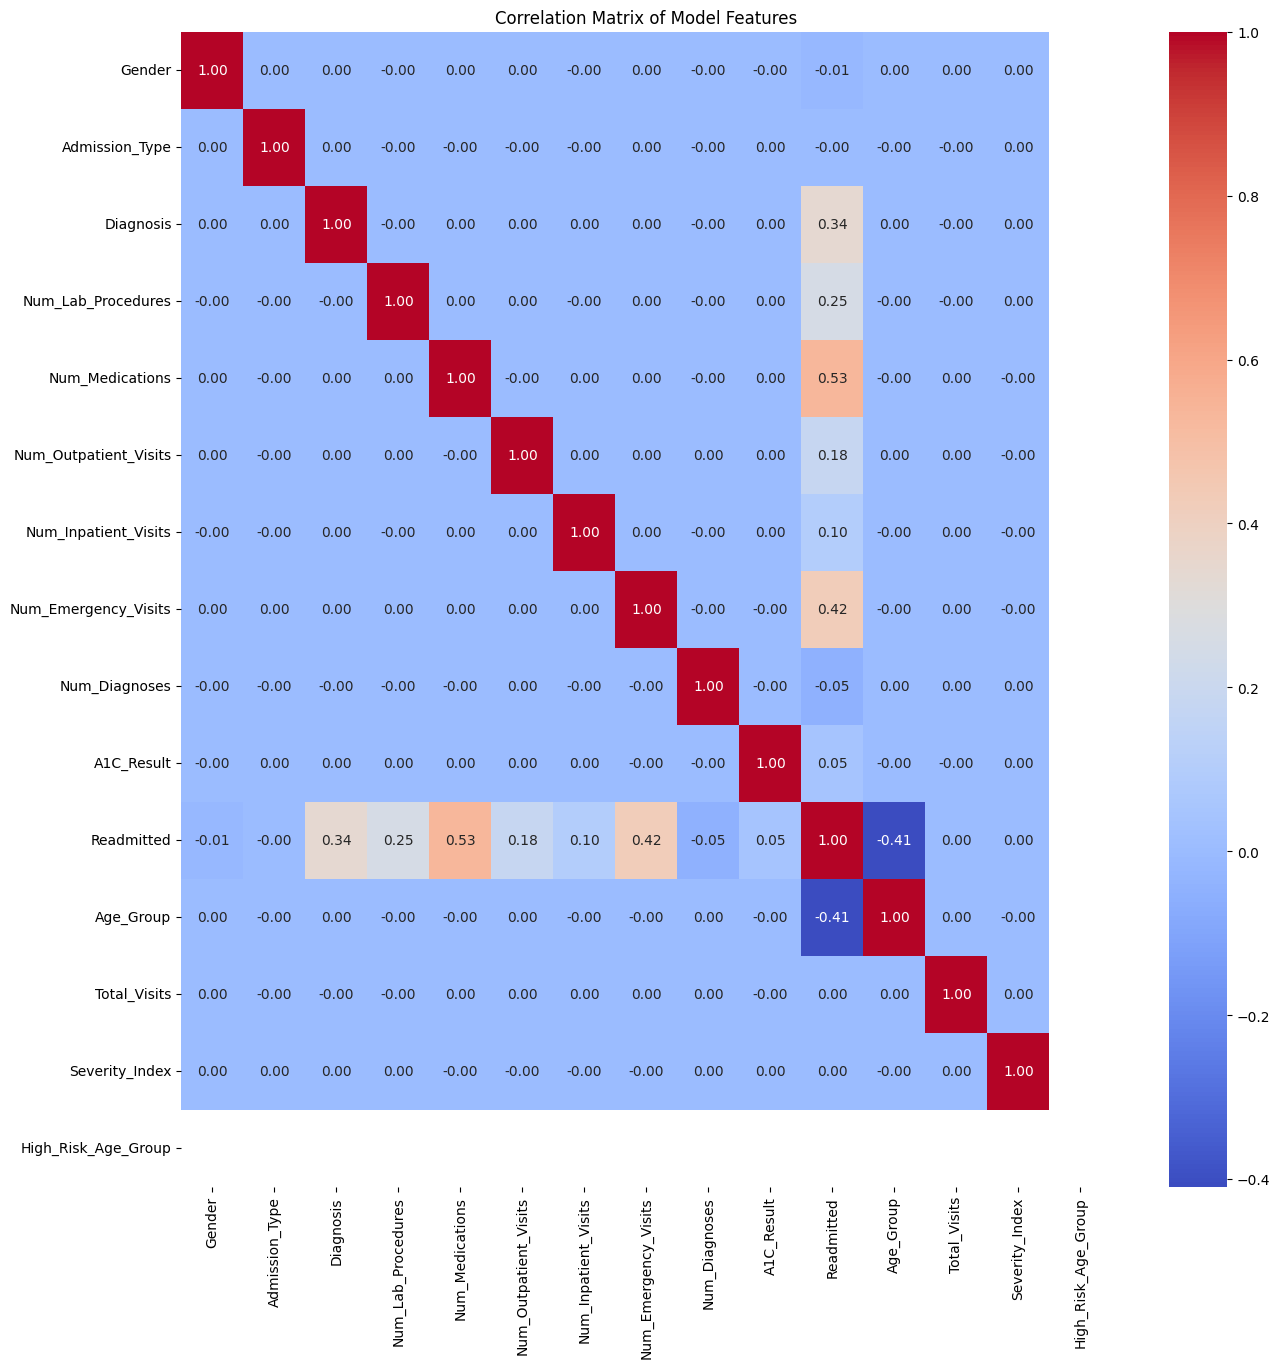

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

def corr_matrix(df, fig_width, fig_height, title):
    """
    Generate a heatmap for the correlation matrix of a DataFrame.

    Parameters:
        df (DataFrame): The input DataFrame containing the data.
        fig_width (int): The width of the figure.
        fig_height (int): The height of the figure.
        title (str): The title of the correlation heatmap.
    """
    # Compute the correlation matrix
    correlation = df.corr()

    # Plot the heatmap
    plt.figure(figsize=(fig_width, fig_height))
    sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title(title)
    plt.show()
# Example usage
corr_matrix(df_processed, 15, 15, 'Correlation Matrix of Model Features')


Text(0.5, 1.01, 'Preprocessed Variable Distributions')

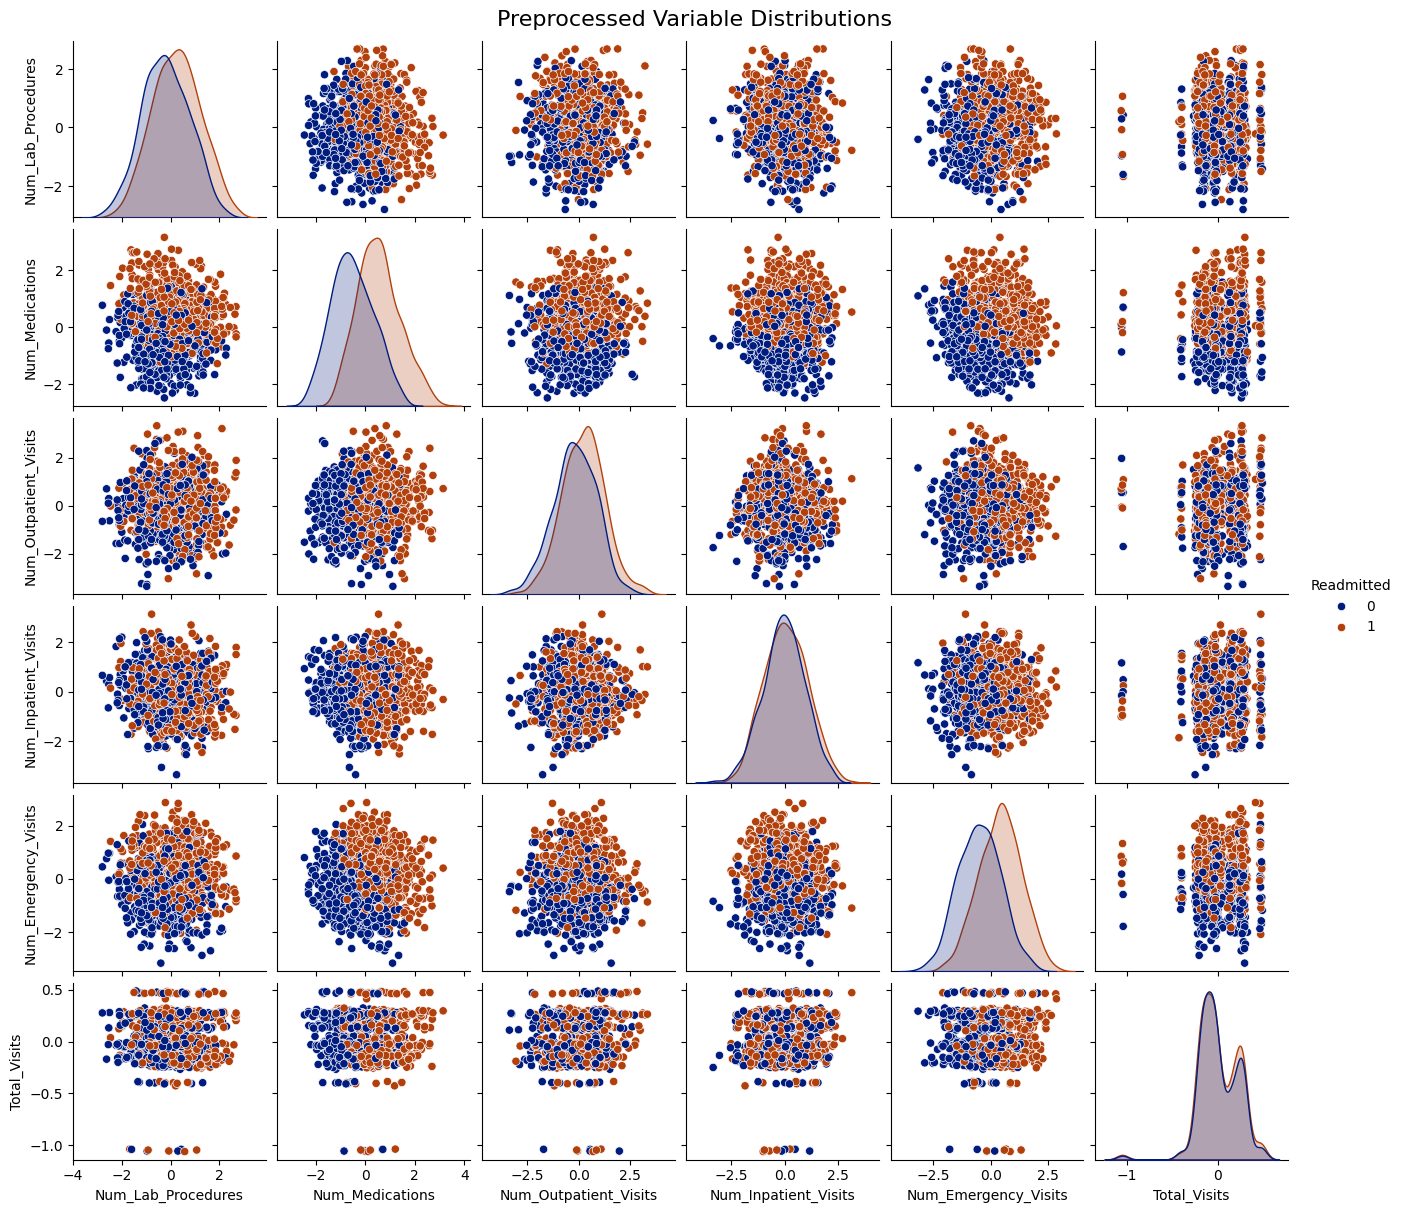

In [45]:
#Let's use a pairplot as a convenient way to visualize the numeric information to see if there are any correlations among the data
#Notice the linear relationships in the following variables: n_lab_procedures, n_medications, n_procedures, time_in_hospital and n_inpatient


g = sns.pairplot(data=df_processed.sample(1000), 
#could use either df_processed or df_features 
#df_processed should show no associations between features as those have been decomposed via PCA
#df_features will show the associations in raw data
             vars = ['Num_Lab_Procedures', 'Num_Medications', 'Num_Outpatient_Visits', 
                     'Num_Inpatient_Visits', 'Num_Emergency_Visits', 'Total_Visits'],  
             kind="scatter", # kind of plots for each pair {‘scatter’, ‘kde’, ‘hist’, ‘reg’}
             diag_kind="kde",   # kind of plots on the diagonal {‘scatter’, ‘kde’, ‘hist’, ‘reg’}
             hue="Readmitted",
             height=2,
             aspect=1.1,
             palette="dark"
             )
g.fig.suptitle("Preprocessed Variable Distributions", fontsize=16, y=1.01)

#Note: These are log transformed, PCA'd (Decomposed) and standardized variables, so interpretation is difficult beyond directional association
#When using the df_features dataframe, Notice seeming linear relationships between time_in_hospital, n_lab_procedures, n_procedures - Appears that time in hospital is related to how many procedures (lab or other) a patient gets during the stay. Can probably remove 1 or two of these

In [32]:
# Split the data into two DataFrames: X (features) and y (target variable)
X = df_processed.drop(columns=['Readmitted'],axis=1)  # Specify at least one column as a feature
y = df_processed["Readmitted"]  # Specify one column as the target variable

# Split the data into train and test subsets
# You can adjust the test size and random state
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.275, random_state=123
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

y_train

1723    0
1504    0
7557    0
6972    1
3488    1
       ..
9785    0
7763    0
5218    0
1346    0
3582    0
Name: Readmitted, Length: 7242, dtype: int64

In [33]:
# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "n_estimators": 97,  # Number of trees in the forest
    "max_depth": 10,  # Max depth of the tree
    "min_samples_split": 3,  # Min number of samples required to split a node
    "min_samples_leaf": 1,  # Min number of samples required at a leaf node
    "ccp_alpha": 0,  # Cost complexity parameter for pruning
    "random_state": 123,
}
#{'n_estimators': 97, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 10, 'ccp_alpha': 0}

# Create a RandomForestRegressor object with the parameters above
rf = RandomForestClassifier(**params)

# Train the random forest on the train set
rf = rf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = rf.predict(X_test)


y_pred = rf.predict(X_test)
print('Training Set:', rf.score(X_train,y_train))
print('Test Set:', rf.score(X_test,y_test))

# Calculate the accuracy, precision, and recall scores
print("Accuracy:", "{:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Precision:", "{:.2f}%".format(precision_score(y_test, y_pred)*100))
print("Recall:", "{:.2f}%".format(recall_score(y_test, y_pred)*100))
print("Area Under the Curve:", "{:.2f}%".format(roc_auc_score(y_test, y_pred)*100))

#100% training set... Overfitted!

Training Set: 0.9991714995857498
Test Set: 0.9868995633187773
Accuracy: 98.69%
Precision: 98.52%
Recall: 98.81%
Area Under the Curve: 98.69%


In [34]:
# Check the distribution of the target variable
print("Class distribution in 'y':")
print(y.value_counts())


# Check class distribution in training and test sets
print("Class distribution in y_train:")
print(y_train.value_counts())

print("\nClass distribution in y_test:")
print(y_test.value_counts())


Class distribution in 'y':
Readmitted
0    5048
1    4942
Name: count, dtype: int64
Class distribution in y_train:
Readmitted
0    3650
1    3592
Name: count, dtype: int64

Class distribution in y_test:
Readmitted
0    1398
1    1350
Name: count, dtype: int64


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Step 1: Initial Model Training on Original Data
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Step 2: Evaluate Initial Models
print("Initial Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

print("\nInitial Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Step 3: Apply SMOTE to Balance the Training Data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Step 4: Retrain Models on Balanced Data
log_reg.fit(X_train_balanced, y_train_balanced)
y_pred_log_reg_balanced = log_reg.predict(X_test)

rf_model.fit(X_train_balanced, y_train_balanced)
y_pred_rf_balanced = rf_model.predict(X_test)

# Step 5: Evaluate Balanced Models
print("\nBalanced Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg_balanced))
print("Balanced Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg_balanced))
print("Balanced Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg_balanced))

print("\nBalanced Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_balanced))
print("Balanced Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_balanced))
print("Balanced Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf_balanced))


Initial Logistic Regression Accuracy: 0.9959970887918487
Confusion Matrix:
 [[1390    8]
 [   3 1347]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1398
           1       0.99      1.00      1.00      1350

    accuracy                           1.00      2748
   macro avg       1.00      1.00      1.00      2748
weighted avg       1.00      1.00      1.00      2748


Initial Random Forest Accuracy: 0.990174672489083
Confusion Matrix:
 [[1387   11]
 [  16 1334]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1398
           1       0.99      0.99      0.99      1350

    accuracy                           0.99      2748
   macro avg       0.99      0.99      0.99      2748
weighted avg       0.99      0.99      0.99      2748


Balanced Logistic Regression Accuracy: 0.9959970887918487
Balanced Logistic Regression Confusion 

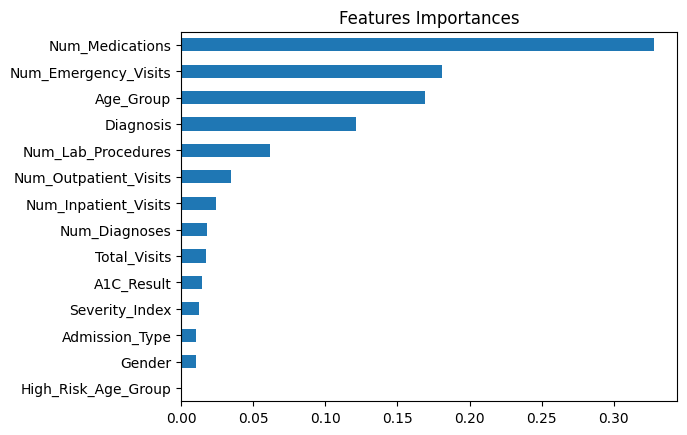

In [36]:
# Create a sorted Series of features importances
importances_sorted = pd.Series(
    data=rf.feature_importances_, index=X_train.columns
).sort_values()

# Plot a horizontal barplot of importances_sorted
importances_sorted.plot(kind="barh")
plt.title("Features Importances")
plt.show()

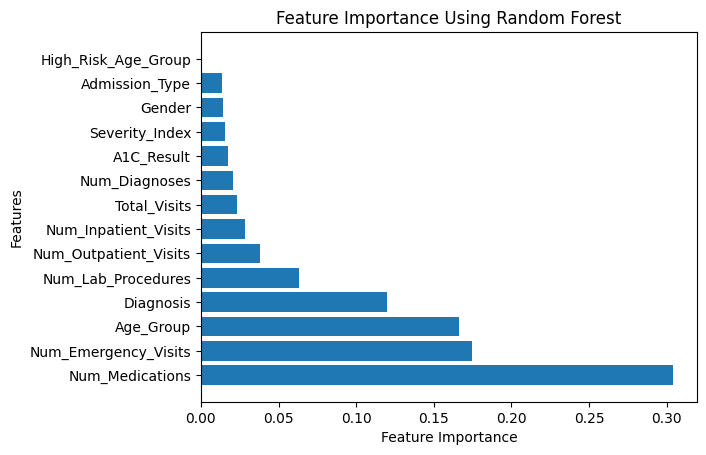

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest and extract feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
importance = model.feature_importances_

# Visualize the feature importance
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Using Random Forest')
plt.show()


In [37]:
# Define parameters: these will need to be tuned to prevent overfitting and underfitting

from sklearn.neighbors import KNeighborsClassifier

params = {
    "n_neighbors": 20
}

# Create a logistic regression classifier object with the parameters above
knn1 = KNeighborsClassifier(**params)

# Train the classifer on the train set
knn1 = knn1.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = knn1.predict(X_test)
print('Training Set:', knn1.score(X_train,y_train))
print('Test Set:', knn1.score(X_test,y_test))

#99% is overfit - This is due to using the untransformed target variable
# Calculate the accuracy, precision, and recall scores
print("Accuracy:", "{:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Precision:", "{:.2f}%".format(precision_score(y_test, y_pred)*100))
print("Recall:", "{:.2f}%".format(recall_score(y_test, y_pred)*100))
print("Area Under the Curve:", "{:.2f}%".format(roc_auc_score(y_test, y_pred)*100))



Training Set: 0.991853079259873
Test Set: 0.9898107714701602
Accuracy: 98.98%
Precision: 99.55%
Recall: 98.37%
Area Under the Curve: 98.97%


In [51]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Perform RFE to select the top 5 features
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)

# Get the selected features
selected_features = rfe.support_  # Boolean mask of selected features
ranking = rfe.ranking_  # Rank of each feature (1 = selected)
print("Selected Features:", selected_features)
print("Feature Ranking:", ranking)


Selected Features: [ True  True False  True  True  True False False False False]
Feature Ranking: [1 1 6 1 1 1 3 2 4 5]


In [40]:
#Dimensionality Reduction
#Doing dimensionality reduction so that logit model doesn't reach perfect separation

dropCols = [#'Num_Lab_Procedures', 
            #'Num_Medications', 
            'Num_Outpatient_Visits', 
            'Num_Inpatient_Visits', 
            'Num_Emergency_Visits',
            #'Total_Visits',
            'High_Risk_Age_Group'
]

df_reduced = df_processed.copy()

for i in dropCols:
    df_reduced.drop(columns = [i], axis=1, inplace=True)

df_reduced

,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Diagnoses,A1C_Result,Readmitted,Age_Group,Total_Visits,Severity_Index
0,-0.493233,0.634109,-1.050357,-0.569659,-0.979192,0.790439,1.713520,0,0.304100,-0.014061,-0.172132
1,-0.013644,0.806059,0.024733,-0.047657,-1.468503,0.353461,0.152819,0,-0.741593,-0.034302,0.136532
2,-2.562550,0.842029,0.194156,0.734978,1.273765,-1.668514,1.063903,1,1.534083,-0.174431,-0.196383
3,-1.265437,0.407919,0.849757,-0.888935,0.332215,1.410141,1.083506,1,-1.137080,-0.146030,-0.171034
4,-4.306925,-0.948903,-1.127524,-1.588559,0.794098,-0.529673,-0.896865,0,1.030104,-0.002642,-0.228501
...,...,...,...,...,...,...,...,...,...,...,...
9985,-1.224310,0.297011,-1.461998,0.154209,-0.112809,0.067574,-1.061443,0,-1.662552,-0.145186,-0.197446
9986,-0.886861,-0.346467,-1.983201,-2.104827,1.408087,-0.384958,-0.752959,0,0.388735,0.222331,-0.225550
9987,0.727393,0.009045,-0.232063,1.463591,-0.399058,-1.098299,-1.804189,0,0.161797,-0.065849,-0.019720
9988,-3.976306,0.086477,1.758809,0.238733,1.548138,-1.218896,-0.411308,1,0.604574,-0.190568,-0.023664


Accuracy: 88.87%
Precision: 88.72%
Recall: 88.43%
Area Under the Curve: 88.86%


Text(0.5, 23.52222222222222, 'Predicted label')

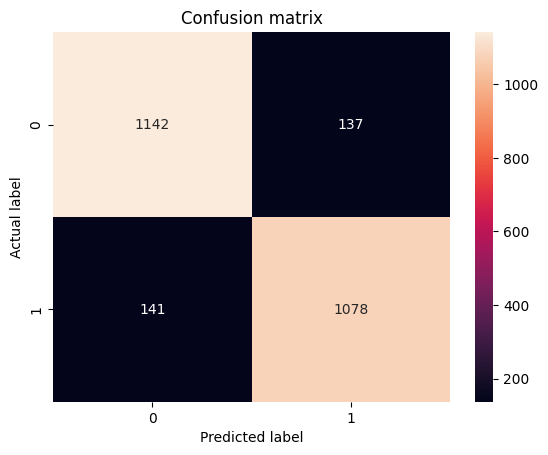

In [48]:
# Split the data into two DataFrames: X (features) and y (target variable)
X = df_reduced.drop(columns=['Readmitted'],axis=1)  # Specify at least one column as a feature
y = df_reduced["Readmitted"]  # Specify one column as the target variable

# Split the data into train and test subsets
# You can adjust the test size and random state
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=123
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "penalty": "l2",  # Norm of the penalty: 'l1', 'l2', 'elasticnet', 'none'
    #"C": 1,  # Inverse of regularization strength, a positive float
    "random_state": 123,
}

# Create a logistic regression classifier object with the parameters above
clf = LogisticRegression(**params)

# Train the classifer on the train set
clf = clf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = clf.predict(X_test)
df_coef = pd.DataFrame(data=clf.coef_[0])

df_coef = df_coef.set_index(np.array(clf.feature_names_in_))
df_coef.rename(columns={0: 'coef'},inplace=True)
df_coef.sort_values('coef')

# Calculate the accuracy, precision, and recall scores
print("Accuracy:", "{:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Precision:", "{:.2f}%".format(precision_score(y_test, y_pred)*100))
print("Recall:", "{:.2f}%".format(recall_score(y_test, y_pred)*100))
print("Area Under the Curve:", "{:.2f}%".format(roc_auc_score(y_test, y_pred)*100))

# Calculate confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot a labeled confusion matrix with Seaborn
sns.heatmap(cnf_matrix, annot=True, fmt="g")
plt.title("Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")


In [ ]:
#Logistic regression coefficients can indicate how strongly each feature affects the target variable (especially for binary targets).

from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Get feature coefficients
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)


NameError: name 'X_train' is not defined

In [ ]:
#Recursive Feature Elimination (RFE)

#RFE iteratively removes the least important features based on model performance, leaving the most important ones.

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Train RFE
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)
